# Modeling Classification Problems

Made for the Data Science Workshop 2018 (African Institute for Mathematical Sciences)

(extended from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

## Imports first

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline

## Load the dataset

In [22]:
# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [23]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [24]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

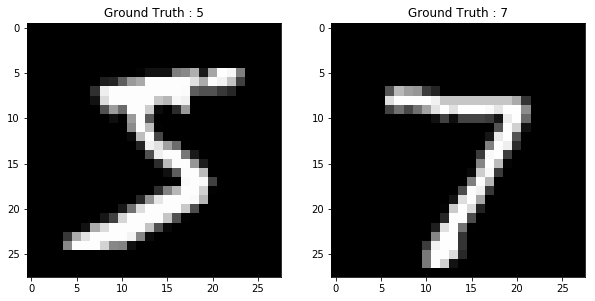

In [25]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [26]:
X_train[0].shape

(28, 28)

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

## Now the data is a long vector

In [29]:
X_train[0].shape

(784,)

In [30]:
X_train[0]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

## Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier

In [31]:
X_train = X_train / 255
X_test = X_test / 255

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [32]:
Y_test[0]

7

In [33]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

## After

In [34]:
Y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

## Create a neural network model

In [36]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(784, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
model = baseline_model()

## Determine the number of trainable parameters

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## Begin training

In [39]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=2, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
11s - loss: 0.2799 - acc: 0.9201 - val_loss: 0.1510 - val_acc: 0.9560
Epoch 2/2
10s - loss: 0.1110 - acc: 0.9680 - val_loss: 0.0959 - val_acc: 0.9719


## Predict on one example

In [40]:
model.predict_classes(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s


array([7])

## Predict on the test data

In [41]:
predictions = model.predict_classes(X_test)

 9728/10000 [============================>.] - ETA: 0s

In [42]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

## Compute the accuracy

In [104]:
correct_values = np.argmax(Y_test,axis=1)

In [105]:
accuracy_score(predictions,correct_values)*100

97.269999999999996

## Exercise

Create a neural network to classify Iris plants based on 4 features. 

A neural network can't output categorical labels directly. They can instead output a number which corresponds to the categorical label. Convert the column in the dataset which contains the target class categorical data using scikit learn. (hint: use the labelEncoder). Add the new data into the dataframe and drop the column with the categorical data. Confusion matrices are useful. Try and use scikit learn to get the confusion matrix for the neural network.

In [67]:
dataset = pd.read_csv('Iris.csv', header=None)

In [49]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
